# Linear regression

In [122]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Purpose of this file is to assess the results of Linear regression in a long period of time
The learning period is 5 years

In [123]:
start1 = datetime.datetime(2013,1,1)
end1 = datetime.datetime(2017,12,31)

In [124]:
startTest1 = datetime.datetime(2018,1,1)
endTest1 = datetime.datetime(2018,12,31)

In [125]:
train = pdr.DataReader('GOOGL', 'yahoo', start1, end1)
test = pdr.DataReader('GOOGL', 'yahoo', startTest1, endTest1)

In [126]:
data = train.reset_index()
dataTest = test.reset_index()

X and y extraction from the resulting datagrame.

In [127]:
X1old = data["Date"]
XTestold = dataTest["Date"]

y1 = data["Close"]
y2 = dataTest["Close"]

Changing the X values to the form where there can be used with the function that calculates linear regression

In [128]:
X1 = X1old[:,np.newaxis]
X2 = XTestold[:,np.newaxis]

C:\Users\kkomt\AppData\Local\Temp\ipykernel_16616\4099859120.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X1 = X1old[:,np.newaxis]
C:\Users\kkomt\AppData\Local\Temp\ipykernel_16616\4099859120.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X2 = XTestold[:,np.newaxis]


The values of X are dates. Dates are in a format called unix time. This is an integerer indicating the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970.
In theory this should not matter for Linear regression. In practice this can result in a problem if the model is calculated by a computer.

Let's imagine a situation where the DATE equals 1671674789 (=Thu Dec 22 2022 10:06:29 UTC+8) and the stock price in this very moment should equal about 25USD. We can put this into the simple equasion 25 = 1671674789 * X => X = 25/1671674789 => X = 1.49550619e-8

As we can see X is a very small number. This is caused by the fact that the date is a very big integer and the resulting y is a small integer.
Computers are however not great when calculating with really really small numbers. This is especially true with our example 
"real numbers cannot, in general, be accurately represented in a fixed space. By definition, floating-point error cannot be eliminated, and, at best, can only be managed." - https://en.wikipedia.org/wiki/Floating-point_error_mitigation


Hence the implemented solution: recode the X variable into a small integer variable.
Let's take the example and code the datetime 1671674789 into the integer number 1. The equasion will now be: 
25 = 1 * X => X = 25/1 => X = 25
Now we no longer have to deal with the problem with the precission on very small numbers. This recoding of variables of course does not change the result of the regression. The only difference is that the dates will now be stored in a non-standardized format. But this can be easilly decoded back to the original UNIX format

In [ ]:
X1numpy = np.arange(len(X1)).reshape(-1, 1)
X2numpy = np.arange(X1numpy[-1],len(X2)+X1numpy[-1]).reshape(-1, 1)

X1coded = X1numpy.tolist()
X2coded = X2numpy.tolist()

Creation of the model

In [130]:
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept=True)

Model fit

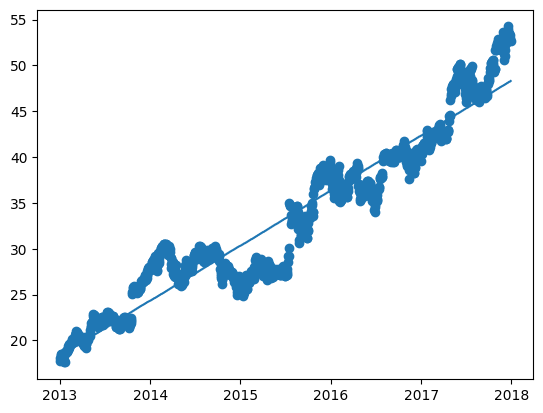

In [131]:
model.fit(X1coded, y1)
yfit = model.predict(X1coded)
plt.scatter(X1, y1) # raw data
plt.plot(X1, yfit) # model fit

The resulting model calculated by the Least square method is: y = 0.023 * x + 18.321

In [132]:
print(model.coef_)
print(model.intercept_)

[0.02381705]
18.320529632109313


Coefficient of determination ("R squared") meassures how much of the entirely variability in the data can be explained by the model. The rest are residuals.
As we can see. Rughly 92% of the entire varibability can be explained by the model.

In [133]:
model.score(X1coded, y1)

0.916448418915099

In [134]:
import statsmodels.api as sm

Regression analysis result summary. Library sm used.
F-statistics (the result of the analysis of variance in regression) shows that the model as a whole is valid. (p-value is close to zero)
If we take a look down at the bottom of the table we can see that if we look at the coeficient and the interecept separetely. Both of them passed the test and are statisically significant.

In [135]:
X3 = sm.add_constant(X1coded)
result = sm.OLS(y1,X3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.380e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:38:39   Log-Likelihood:                -2999.4
No. Observations:                1260   AIC:                             6003.
Df Residuals:                    1258   BIC:                             6013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3205      0.147    124.284      0.000      18.031      18.610
x1             0.0238      0.000    117.467      0.000       0.023       0.024
==============================================================================
Omnibus:                       15.900   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.520
Skew:                          -0.157   Prob(JB):                      0.00191
Kurtosis:                       2.625   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Resiudal plot shows a problem with heteroscedasticity. Regression prerequisite not met. 

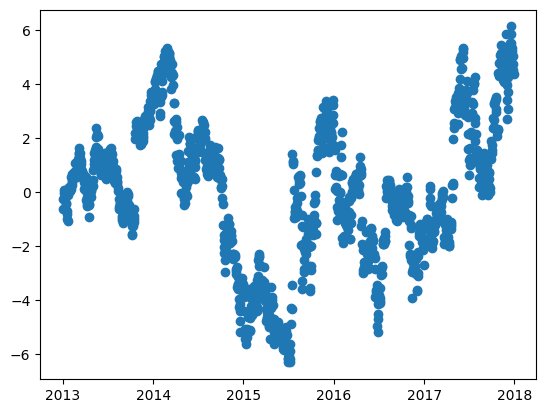

In [136]:
plt.scatter(X1, result.resid)

Q-Q plot shows that residuals are not normaly distribution => Regression prerequisite  not met. 

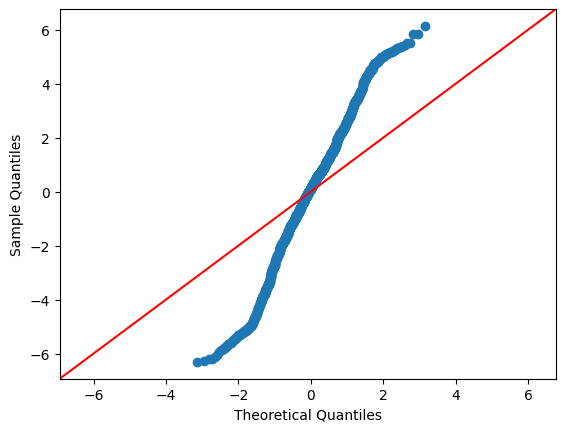

In [137]:
import pylab

sm.qqplot(result.resid, line='45')
pylab.show()

histogram shows that residuals are not normally distributied => Regression prerequisite not met. 

(array([ 51.,  71.,  83., 147., 230., 271., 185., 111.,  75.,  36.]),
 array([-6.31172539, -5.06666906, -3.82161274, -2.57655642, -1.3315001 ,
        -0.08644378,  1.15861255,  2.40366887,  3.64872519,  4.89378151,
         6.13883783]),
 <BarContainer object of 10 artists>)

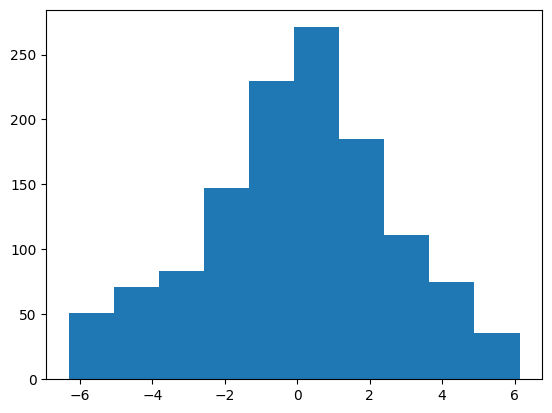

In [138]:
# residuals are somewhat normally distributed
plt.hist(result.resid)

Application of the model to new data => Prediction
Blue part = data where the model was calculated on
Orange part = data which the model is trying to predict

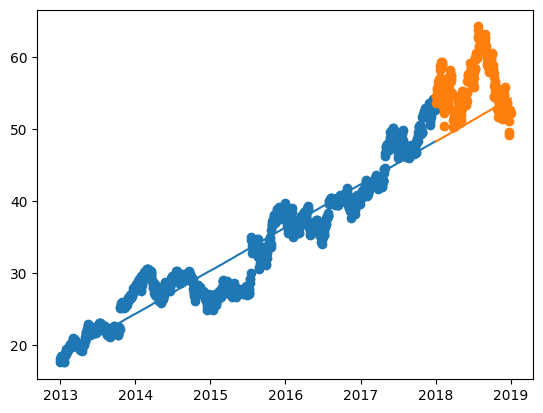

In [140]:
yfit2 = model.predict(X2coded)
plt.scatter(X1, y1) # raw data
plt.scatter(X2, y2) # raw data
plt.plot(X1, yfit) # model fit
plt.plot(X2, yfit2) # model fit